In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn

In [2]:
# download data from https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
raw =pd.read_csv('C:/Users/hmxu/Desktop/ML/Anomaly/Credit_Card_Fraud/creditcard.csv')
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
raw.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
raw['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data=raw.copy()

In [7]:
# feature engineering  # create a new categorical field from charge amount
data['Amount_bin']=pd.cut(data['Amount'],20)
data['Amount_Cat']=data['Amount_bin'].cat.codes
data['Amount_Cat'].value_counts()

0     282968
1       1427
2        274
3         86
4         22
5         14
6          8
9          2
7          2
19         1
15         1
14         1
10         1
Name: Amount_Cat, dtype: int64

In [8]:
binCount=data[['Class', 'Amount_bin', 'Amount_Cat','Amount']].groupby(['Class', 'Amount_bin', 'Amount_Cat']).agg(['count'])
binCount

Amount
                                         count
Class Amount_bin            Amount_Cat        
0     (-25.691, 1284.558]   0           282483
      (1284.558, 2569.116]  1             1420
      (2569.116, 3853.674]  2              274
      (3853.674, 5138.232]  3               86
      (5138.232, 6422.79]   4               22
      (6422.79, 7707.348]   5               14
      (7707.348, 8991.906]  6                8
      (8991.906, 10276.464] 7                2
      (11561.022, 12845.58] 9                2
      (12845.58, 14130.138] 10               1
      (17983.812, 19268.37] 14               1
      (19268.37, 20552.928] 15               1
      (24406.602, 25691.16] 19               1
1     (-25.691, 1284.558]   0              485
      (1284.558, 2569.116]  1                7

In [9]:
data.dtypes

Time           float64
V1             float64
V2             float64
V3             float64
V4             float64
V5             float64
V6             float64
V7             float64
V8             float64
V9             float64
V10            float64
V11            float64
V12            float64
V13            float64
V14            float64
V15            float64
V16            float64
V17            float64
V18            float64
V19            float64
V20            float64
V21            float64
V22            float64
V23            float64
V24            float64
V25            float64
V26            float64
V27            float64
V28            float64
Amount         float64
Class            int64
Amount_bin    category
Amount_Cat        int8
dtype: object

In [10]:
#list all columns that has null
null_columns=data.columns[data.isnull().any()]
data.columns[data.isnull().any()]

Index([], dtype='object')

In [11]:
# separate features and labeld
X=data
X=X.drop('Class',axis=1)
X=X.drop('Amount_bin',axis=1)
Y=data['Class']
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# split data
x_train,x_test,y_train, y_test =train_test_split(X,Y,test_size=0.3, random_state=100)
y_test.value_counts()

0    85301
1      142
Name: Class, dtype: int64

In [13]:
# oversampling train data only, not testing data
smenn = SMOTEENN(random_state=7, ratio = 1.0)
x_train_bal, y_train_bal = smenn.fit_sample(x_train, y_train)
np.bincount(y_train_bal)

array([183190, 190860], dtype=int64)

In [14]:
# sampling data for grid search (consuming lots of resources)
oversampl=pd.DataFrame(x_train_bal)
oversampl['label']=y_train_bal
ovs=oversampl.sample(20000)
x_ovs=ovs.iloc[:,:31]
y_ovs=ovs['label']

In [15]:
# check label data type (should be sparse not continous data)
y_ovs.dtypes

dtype('int64')

In [16]:
# Random Search is much fast than Grid Search
# try different parameters and rerun
rfc=RandomForestClassifier(random_state=25)
param_grid = { 
    'n_estimators': [100,120,140],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [14,16,18],
    'criterion' :['gini', 'entropy']
}
randSCV = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv= 3, verbose=2, random_state=42, n_jobs = -1)

randSCV.fit(x_ovs, y_ovs)

C:\Users\hmxu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 120, 140], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [14, 16, 18], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [17]:
# get the best parameters
bestPm=randSCV.best_params_
bestPm

{'n_estimators': 140,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'entropy'}

In [18]:
# set with best parameters
bestCVModel=RandomForestClassifier(n_estimators=140,criterion='entropy',max_depth=18,max_features='auto',random_state=25)
bestCVModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [19]:
print('Accuracy:',bestCVModel.score(x_test, y_test))
print('Recall:',recall_score(y_test, bestCVModel.predict(x_test)))

Accuracy: 0.9994733330992591
Recall: 0.7464788732394366


Text(0.5, 1.0, 'Accuracy vs Recall')

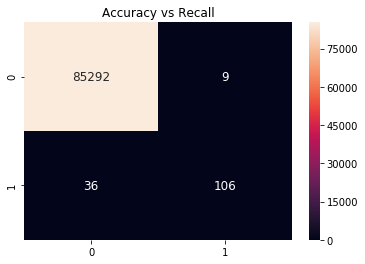

In [20]:
y_pred = bestCVModel.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm)
seaborn.heatmap(cm, annot=True, fmt='g', annot_kws={"size": 12})
plt.title('Accuracy vs Recall')